<a href="https://colab.research.google.com/github/aashasandeep/User-Analytics-in-the-Telecommunication-Industry---Overview/blob/main/Telcom_data_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import liabriries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Telcom_data = pd.read_excel('/content/Cleaned_telcom_data (1).xlsx')

In [ ]:
Telcom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814,569138589.0


In [ ]:
Telcom_data.shape

(150001, 55)

#Calculate Session Frequency

In [ ]:
session_frequency_IMSI = Telcom_data.groupby('IMSI')['Bearer Id'].count().reset_index()
session_frequency_IMSI.columns = ['IMSI', 'Session Frequency']

In [ ]:
session_frequency_IMSI.head()

,IMSI,Session Frequency
0,204047108489451,1
1,204080810288647,1
2,208200101016140,1
3,208200101127285,1
4,208200101148045,2


#Calculate Session Duration

In [ ]:
session_duration_IMSI = Telcom_data.groupby('IMSI')['Dur. (ms)'].sum().reset_index()
session_duration_IMSI.columns = ['IMSI', 'Total Session Duration (ms)']

In [ ]:
session_duration_IMSI.head()

,IMSI,Total Session Duration (ms)
0,204047108489451,869844
1,204080810288647,877385
2,208200101016140,86019
3,208200101127285,86254
4,208200101148045,573923


# Calculate Session Total Traffic

In [ ]:
Telcom_data['Total Traffic (Bytes)'] = Telcom_data['Total DL (Bytes)'] + Telcom_data['Total UL (Bytes)']

In [ ]:
total_traffic_IMSI = Telcom_data.groupby('IMSI')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_IMSI.columns = ['IMSI', 'Total Traffic (Bytes)']

In [ ]:
total_traffic_IMSI.head()

,IMSI,Total Traffic (Bytes)
0,204047108489451,1.391536e+08
1,204080810288647,2.321240e+08
2,208200101016140,8.517164e+07
3,208200101127285,4.265016e+08
4,208200101148045,1.033092e+09


# Merge the metrics into a single dataframe

In [ ]:
user_engagement_IMSI = session_frequency_IMSI.merge(session_duration_IMSI, on='IMSI')
user_engagement_IMSI = user_engagement_IMSI.merge(total_traffic_IMSI, on='IMSI')

In [ ]:
user_engagement_IMSI.head()

,IMSI,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
0,204047108489451,1,869844,1.391536e+08
1,204080810288647,1,877385,2.321240e+08
2,208200101016140,1,86019,8.517164e+07
3,208200101127285,1,86254,4.265016e+08
4,208200101148045,2,573923,1.033092e+09


# Analyze the Engagement Scores Plot histograms of the engagement metrics

Text(0.5, 1.0, 'Session Frequency Distribution')

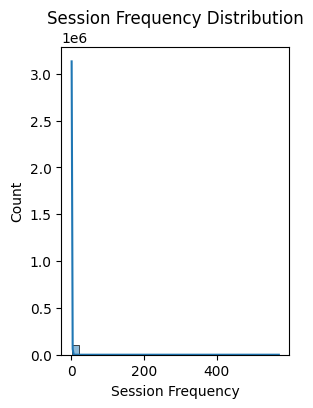

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(user_engagement_IMSI['Session Frequency'], bins=30, kde=True)
plt.title('Session Frequency Distribution')

Text(0.5, 1.0, 'Total Session Duration Distribution')

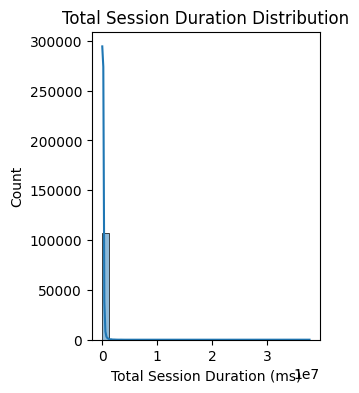

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 2)
sns.histplot(user_engagement_IMSI['Total Session Duration (ms)'], bins=30, kde=True)
plt.title('Total Session Duration Distribution')

Text(0.5, 1.0, 'Total Traffic Distribution')

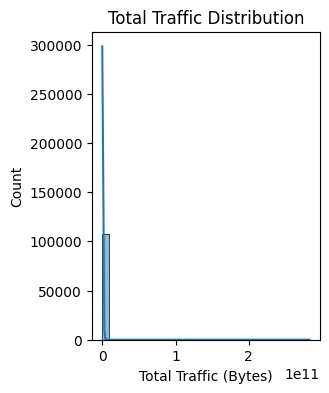

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 3)
sns.histplot(user_engagement_IMSI['Total Traffic (Bytes)'], bins=30, kde=True)
plt.title('Total Traffic Distribution')

Conclusion
This approach allows you to track and analyze user engagement based on session frequency, duration, and total traffic. These insights can help technical teams focus their efforts on optimizing network resources for different user clusters, ultimately enhancing the overall user experience.

In [ ]:
Telcom_data.shape

(150001, 56)

# Aggregate Metrics Per Customer ID (MSISDN)

In [ ]:
#Calculate session frequency per MSISDN
session_frequency_MSISDN = Telcom_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency_MSISDN.columns = ['MSISDN/Number', 'Session Frequency']

In [ ]:
session_frequency_MSISDN.head()

,MSISDN/Number,Session Frequency
0,33601001722,1
1,33601001754,1
2,33601002511,1
3,33601007832,1
4,33601008617,2


In [ ]:
# Calculate total session duration per MSISDN
session_duration_MSISDN = Telcom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration_MSISDN.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

In [ ]:
session_duration_MSISDN.head()

,MSISDN/Number,Total Session Duration (ms)
0,33601001722,116720
1,33601001754,181230
2,33601002511,134969
3,33601007832,49878
4,33601008617,37104


In [ ]:
#Calculate total session duration per MSISDN
session_duration_MSISDN = Telcom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration_MSISDN.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

In [ ]:
session_duration_MSISDN.head()

,MSISDN/Number,Total Session Duration (ms)
0,33601001722,116720
1,33601001754,181230
2,33601002511,134969
3,33601007832,49878
4,33601008617,37104


In [ ]:
# Calculate total traffic per MSISDN
total_traffic_MSISDN = Telcom_data.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_MSISDN.columns = ['MSISDN/Number', 'Total Traffic (Bytes)']

In [ ]:
total_traffic_MSISDN.head()

,MSISDN/Number,Total Traffic (Bytes)
0,33601001722,8.786906e+08
1,33601001754,1.568596e+08
2,33601002511,5.959665e+08
3,33601007832,4.223207e+08
4,33601008617,1.457411e+09


# Merge the metrics into a single dataframe

In [ ]:
user_engagement_MSISDN = session_frequency_MSISDN.merge(session_duration_MSISDN, on='MSISDN/Number')
user_engagement_MSISDN = user_engagement_MSISDN.merge(total_traffic_MSISDN, on='MSISDN/Number')

Report the top 10 customers per engagement metric

In [ ]:
top_10_session_frequency = user_engagement_MSISDN.nlargest(10, 'Session Frequency')

In [ ]:
top_10_session_frequency

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
53644,33663706799,1067,72655568,5.319636e+11
13526,33626320676,18,8791927,7.971167e+09
6437,33614892860,17,9966898,8.846226e+09
13180,33625779332,17,18553754,8.499621e+09
37052,33659725664,16,4035428,7.705863e+09
76363,33675877202,15,4865947,7.891111e+09
92923,33760536639,15,9279434,8.514774e+09
65118,33667163239,13,8744914,5.618394e+09
666,33603127838,12,6287761,4.976195e+09
1279,33604515716,12,5207990,5.487855e+09


Normalize Metrics and Run K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_engagement_MSISDN[['Session Frequency',
                                                           'Total Session Duration (ms)',
                                                           'Total Traffic (Bytes)']])

Run k-means clustering (k=3)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_metrics)
user_engagement_MSISDN['Cluster'] = kmeans.labels_

In [ ]:
#Compute statistics for each cluster
cluster_stats = user_engagement_MSISDN.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

In [ ]:
cluster_stats

Session Frequency                             \
                      min   max         mean     sum   
Cluster                                                
0                       1     4     1.224299  119581   
1                    1067  1067  1067.000000    1067   
2                       1    18     3.196798   29353   

        Total Session Duration (ms)                                       \
                                min       max          mean          sum   
Cluster                                                                    
0                              7142    428467  1.131117e+05  11047954943   
1                          72655568  72655568  7.265557e+07     72655568   
2                             89973  18553754  4.977957e+05   4570759940   

        Total Traffic (Bytes)                                            
                          min           max          mean           sum  
Cluster                                                                  
0                3.324901e+07  2.762548e+09  6.020907e+08  5.880800e+13  
1                5.319636e+11  5.319636e+11  5.319636e+11  5.319636e+11  
2                5.714004e+07  8.846226e+09  1.636379e+09  1.502523e+13

Aggregate User Total Traffic Per Application


In [ ]:
application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)',
                      'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
                      'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

In [ ]:
# Calculate total traffic per application
for app in application_columns:
    Telcom_data[app + ' Total'] = Telcom_data[app]

In [ ]:
# Sum the total traffic per application per user
application_traffic = Telcom_data.groupby('MSISDN/Number')[['Social Media DL (Bytes) Total',
                                                   'Social Media UL (Bytes) Total',
                                                   'Google DL (Bytes) Total',
                                                   'Google UL (Bytes) Total',
                                                   'Email DL (Bytes) Total',
                                                   'Email UL (Bytes) Total',
                                                   'Youtube DL (Bytes) Total',
                                                   'Youtube UL (Bytes) Total',
                                                   'Netflix DL (Bytes) Total',
                                                   'Netflix UL (Bytes) Total',
                                                   'Gaming DL (Bytes) Total',
                                                   'Gaming UL (Bytes) Total',
                                                   'Other DL (Bytes) Total',
                                                   'Other UL (Bytes) Total']].sum().reset_index()

Derive top 10 most engaged users per application

In [ ]:
top_10_per_app = {}
for app in application_columns:
    app_col = app + ' Total'
    top_10_per_app[app] = application_traffic.nlargest(10, app_col)

In [ ]:
top_10_per_app

{'Social Media DL (Bytes)':         MSISDN/Number  Social Media DL (Bytes) Total  \
 53644     33663706799                   1.938043e+09   
 13526     33626320676                   4.274384e+07   
 92923     33760536639                   3.929765e+07   
 37052     33659725664                   3.490044e+07   
 6437      33614892860                   2.774974e+07   
 13180     33625779332                   2.656412e+07   
 65118     33667163239                   2.375375e+07   
 106137    33786323068                   2.356866e+07   
 70960     33669068942                   2.347705e+07   
 666       33603127838                   2.277668e+07   
 
         Social Media UL (Bytes) Total  Google DL (Bytes) Total  \
 53644                    3.615635e+07             6.009292e+09   
 13526                    6.309420e+05             1.161065e+08   
 92923                    4.855430e+05             8.862653e+07   
 37052                    5.119140e+05             9.095855e+07   
 6437    

Slide Presentation
Show top 10 customers for session frequency, total session duration, and total traffic

Include data tables or charts

Plot Top 3 Most Used Applications

In [ ]:
application_totals = application_traffic.sum().reset_index()
application_totals.columns = ['Application', 'Total Traffic (Bytes)']

In [ ]:
application_totals

,Application,Total Traffic (Bytes)
0,MSISDN/Number,4.820780e+15
1,Social Media DL (Bytes) Total,2.693001e+11
2,Social Media UL (Bytes) Total,4.939298e+09
3,Google DL (Bytes) Total,8.626186e+11
4,Google UL (Bytes) Total,3.084833e+11
5,Email DL (Bytes) Total,2.687611e+11
6,Email UL (Bytes) Total,7.010648e+10
7,Youtube DL (Bytes) Total,1.745123e+12
8,Youtube UL (Bytes) Total,1.651423e+12
9,Netflix DL (Bytes) Total,1.744039e+12


In [ ]:
# Filter out the MSISDN column
application_totals = application_totals[application_totals['Application'] != 'MSISDN/Number']

In [ ]:
top_3_apps = application_totals.nlargest(3, 'Total Traffic (Bytes)')

In [ ]:
top_3_apps

,Application,Total Traffic (Bytes)
11,Gaming DL (Bytes) Total,6.330713e+13
13,Other DL (Bytes) Total,6.316550e+13
7,Youtube DL (Bytes) Total,1.745123e+12


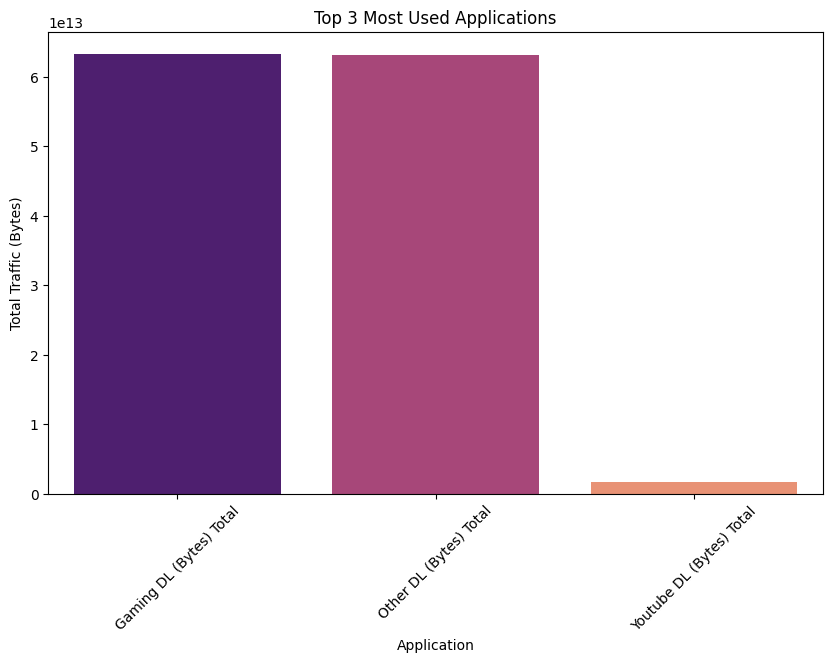

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps , palette='magma')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)
plt.show()

Slide Presentation
Show bar chart of top 3 most used applications

Include traffic data

Optimize k for K-Means Using the Elbow Method

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

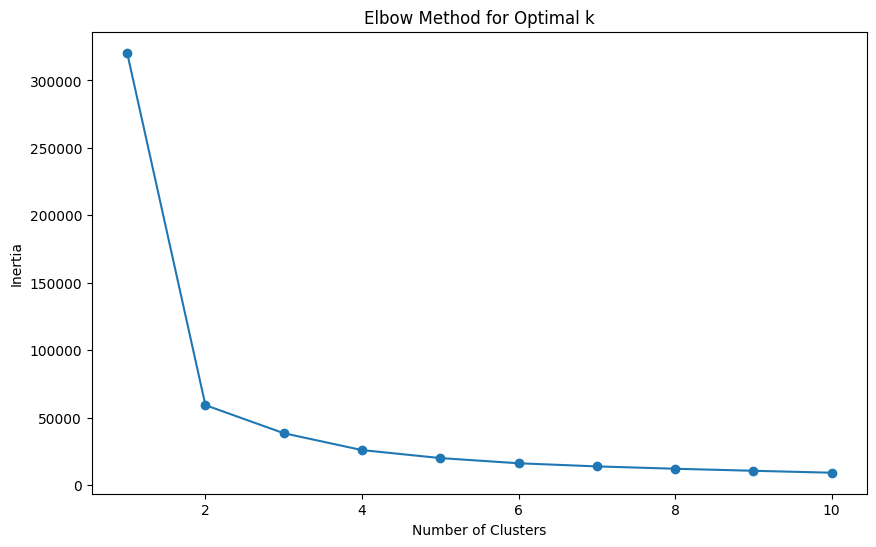

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Slide Presentation
Explain the elbow method

Show the elbow curve and optimal k value

The elbow method involves running the K-means clustering algorithm on the dataset for a range of values for K (the number of clusters). For each K, the algorithm calculates the sum of squared distances (SSE) between each data point and the centroid of its assigned cluster, also known as inertia or within-cluster sum of squares (WCSS).

Conclusion
Summarize findings and insights

Discuss implications for network resource allocation and user engagement improvement

In [ ]:
Telcom_data.shape

(150001, 70)

In [ ]:
Telcom_data.to_excel('/content/featured_telcom_data.xlsx', index=False)
